In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Sample_Superstore.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df.drop(columns=["Row ID", "Country", "Customer Name"], inplace=True)

In [6]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)
df.shape

(9993, 18)

In [7]:
df.duplicated().sum()

0

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

In [12]:
df['delivery_time'] = df['Ship Date'] - df['Order Date']

In [13]:
df['delivery_time']=df['delivery_time'].astype(str)
df['delivery_time']=df['delivery_time'].str.replace('days','').astype(int).abs()

In [ ]:
df.drop(columns=['Order Date','Ship Date'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9993 non-null   object        
 1   Order Date     9993 non-null   datetime64[ns]
 2   Ship Date      9993 non-null   datetime64[ns]
 3   Ship Mode      9993 non-null   object        
 4   Customer ID    9993 non-null   object        
 5   Segment        9993 non-null   object        
 6   City           9993 non-null   object        
 7   State          9993 non-null   object        
 8   Postal Code    9993 non-null   int64         
 9   Region         9993 non-null   object        
 10  Product ID     9993 non-null   object        
 11  Category       9993 non-null   object        
 12  Sub-Category   9993 non-null   object        
 13  Product Name   9993 non-null   object        
 14  Sales          9993 non-null   float64       
 15  Quantity       9993 non-nu

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_4668\1580612449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

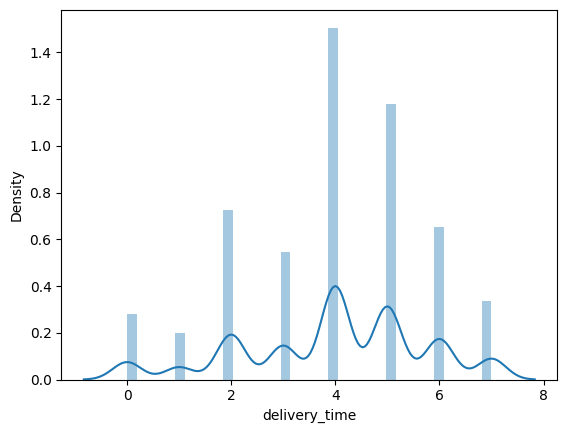

In [16]:
sns.distplot(df['delivery_time'])

<Axes: xlabel='delivery_time', ylabel='Count'>

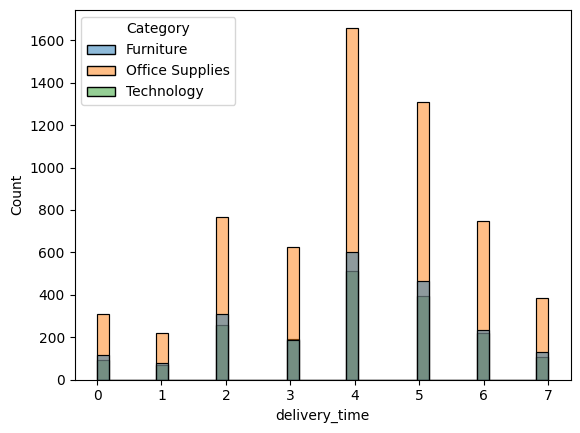

In [17]:
sns.histplot(data=df, x="delivery_time", hue="Category")

- Maximum product delivered in 0 to 20 day

In [ ]:
df.groupby('State')['City'].value_counts().head(20)

<Axes: xlabel='Ship Mode', ylabel='Count'>

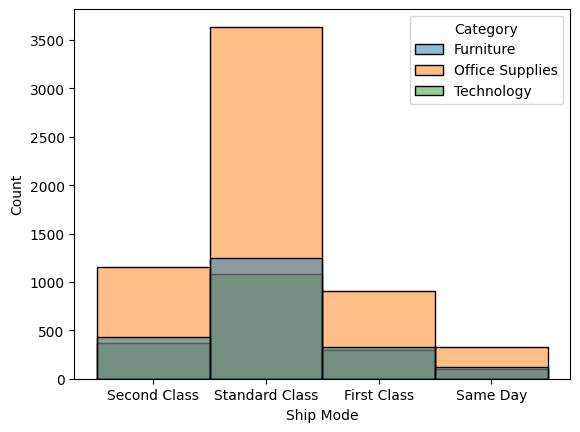

In [37]:
sns.histplot(data=df, x='Ship Mode', hue='Category')

[Text(0.5, 1.0, "Shiping mode of type of costumer's")]

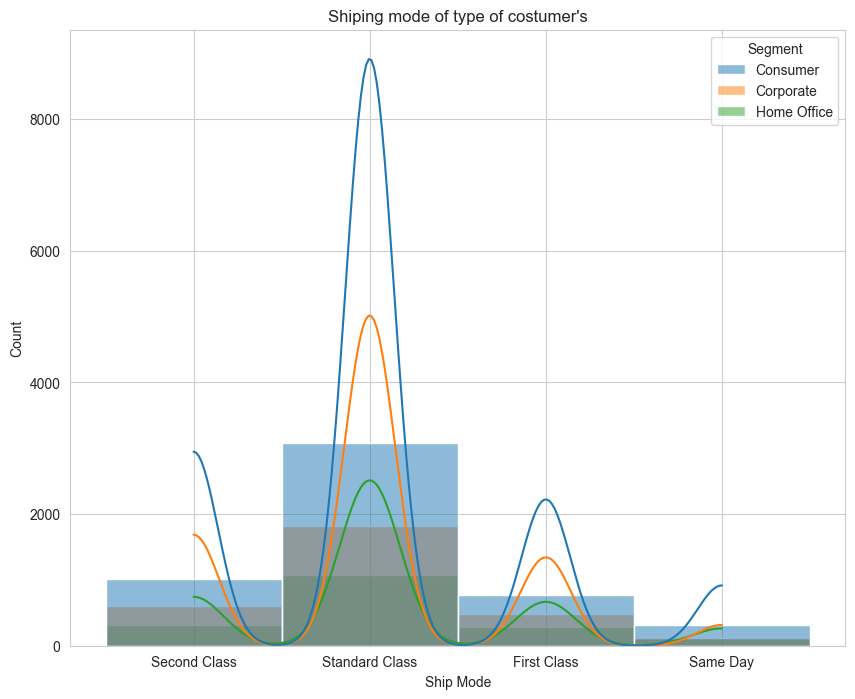

In [80]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Ship Mode', hue='Segment', kde=True).set(title="Shiping mode of type of costumer's")

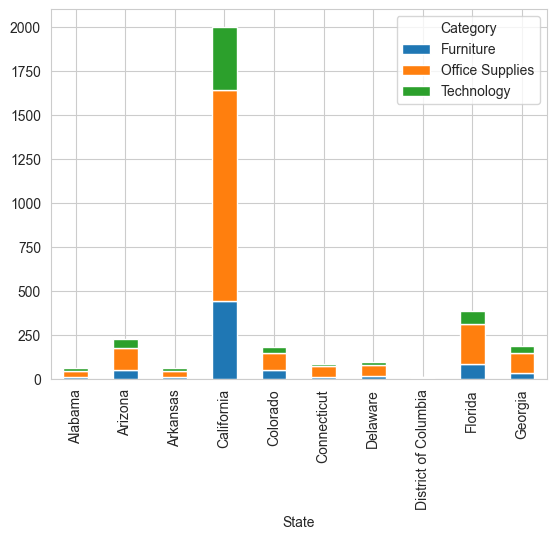

In [91]:
df.groupby('State')['Category'].value_counts().head(30).unstack().plot(kind='bar', stacked=True)
plt.show()

<Axes: xlabel='Segment'>

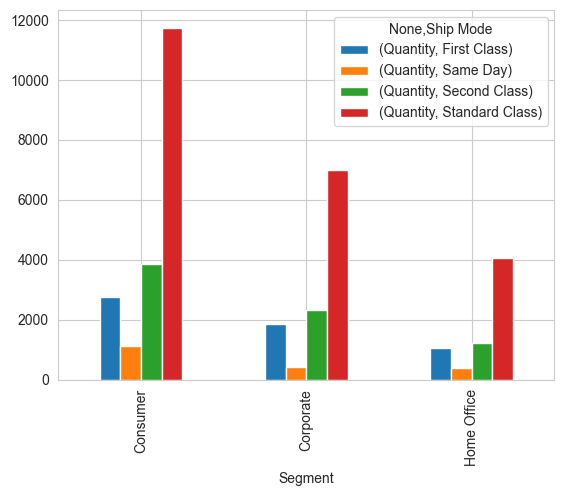

In [95]:
group_data=df.groupby(["Segment","Ship Mode"])[["Quantity"]].sum()
group_data.unstack().plot(kind='bar')

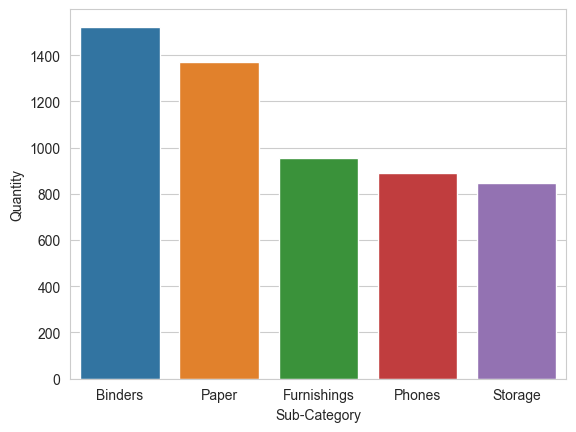

In [149]:
sns.barplot(data=df.groupby("Sub-Category")["Quantity"].count().sort_values(ascending=False).head(5).reset_index(), x="Sub-Category", y="Quantity")

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13272\1804590705.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=df.groupby(["Segment","Ship Mode"]).sum().reset_index(), x="Segment", y="Sales", hue="Ship Mode")


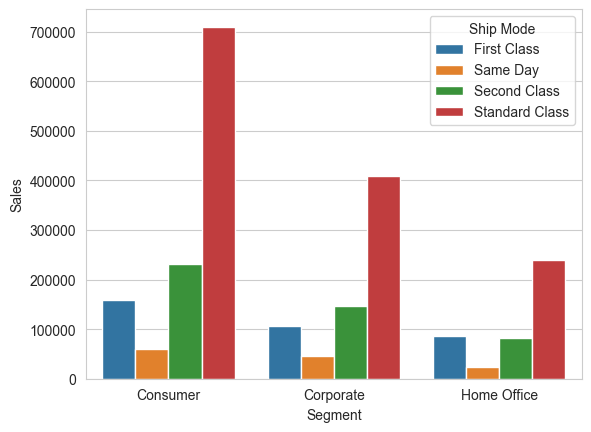

In [147]:
sns.barplot(data=df.groupby(["Segment","Ship Mode"]).sum().reset_index(), x="Segment", y="Sales", hue="Ship Mode")

# Show the plot
plt.show()

<Axes: >

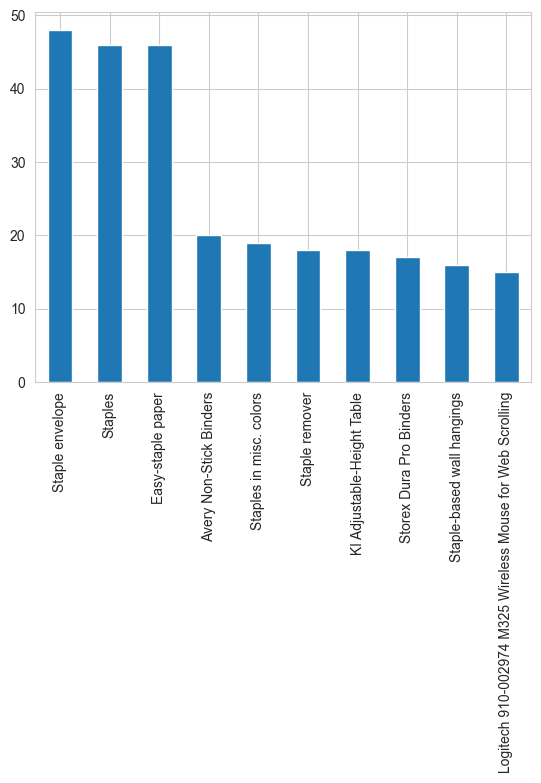

In [94]:
df['Product Name'].value_counts().head(10).plot(kind='bar')

C:\Users\HP\AppData\Local\Temp\ipykernel_8744\784548825.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp=pd.DataFrame(df.groupby('Sub-Category').sum()['Quantity'].reset_index())


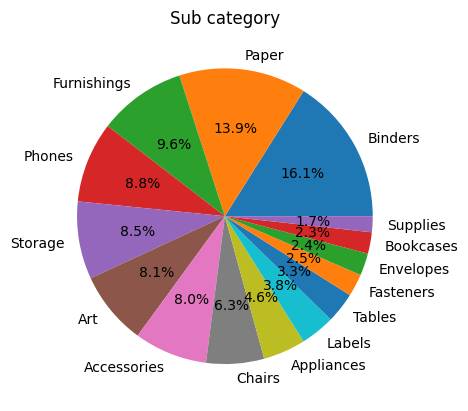

In [47]:
temp=pd.DataFrame(df.groupby('Sub-Category').sum()['Quantity'].reset_index())
temp=temp.sort_values('Quantity', ascending=False).head(15)

fig, ax = plt.subplots()
ax.pie(temp['Quantity'], labels=temp['Sub-Category'], autopct='%1.1f%%')

ax.set_title('Sub category')

plt.show()

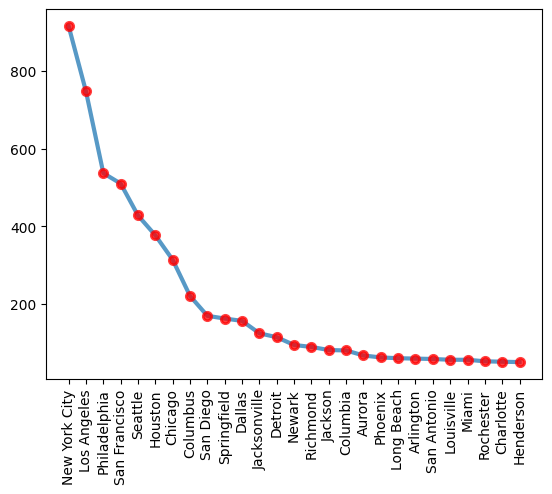

In [27]:
temp=df.groupby(['City'], as_index=False)['City'].value_counts().sort_values(by='City', ascending=False)
temp.sort_values(by='count', ascending=False, inplace=True)
temp=temp[temp['count']>50]
plt.plot(temp['City'], temp['count'], alpha=.75, lw=3, marker='o', markeredgecolor='r', markerfacecolor='r', markeredgewidth=2)
plt.xticks(rotation='vertical')
plt.show()

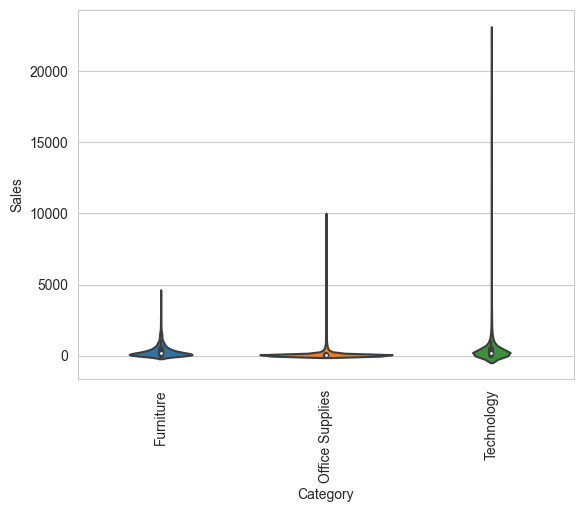

In [151]:
sns.violinplot(data=df, x="Category", y="Sales")
plt.xticks(rotation="vertical")
plt.show()

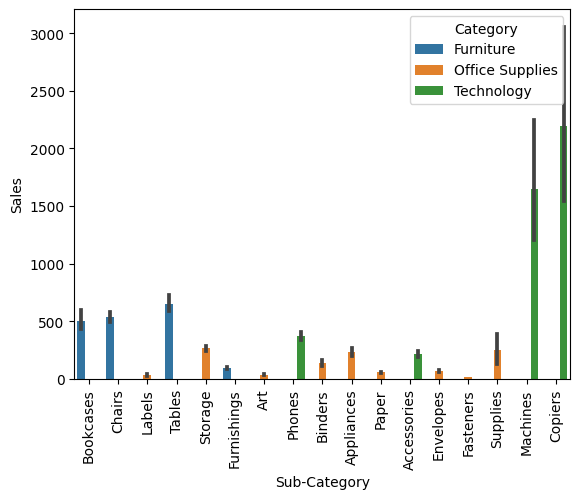

In [38]:
sns.barplot(data=df, x='Sub-Category', y='Sales', hue='Category')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8744\3013545594.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=df.groupby(['Category','Segment']).sum().reset_index(), x="Segment", y="Sales", hue="Category")


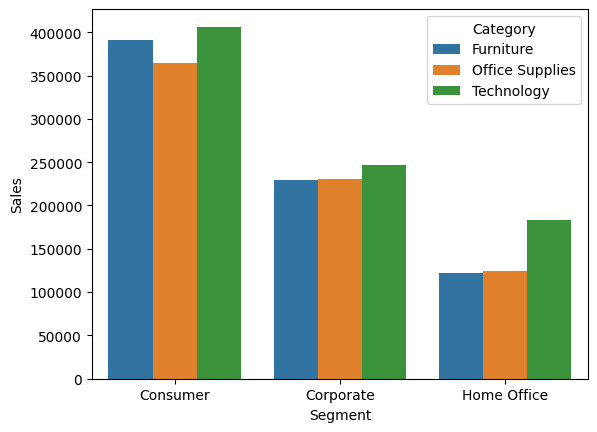

In [22]:
sns.barplot(data=df.groupby(['Category','Segment']).sum().reset_index(), x="Segment", y="Sales", hue="Category")

plt.show()

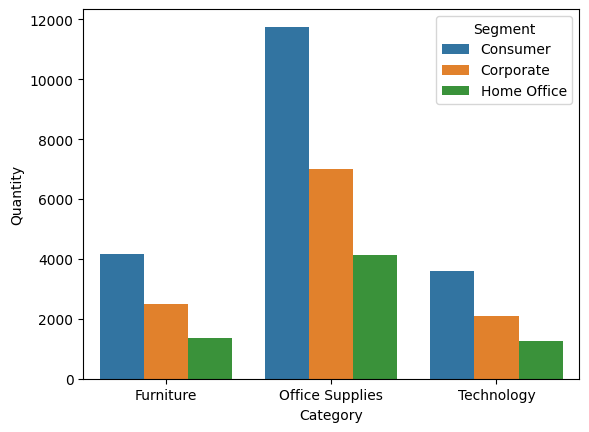

In [33]:
sns.barplot(data=df.groupby(['Category','Segment'])[['Quantity']].sum().reset_index(), x="Category", y="Quantity", hue="Segment")

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8744\3208588377.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp=pd.DataFrame(df.groupby('Segment').sum()[['Sales','Quantity']]).reset_index()


<Axes: xlabel='Segment', ylabel='Sales'>

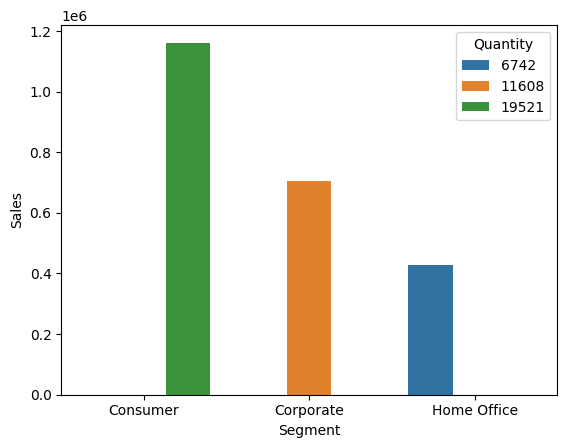

In [37]:
temp=pd.DataFrame(df.groupby('Segment').sum()[['Sales','Quantity']]).reset_index()
sns.barplot(x=temp.iloc[:,0], y=temp.iloc[:,1], hue=temp['Quantity'])

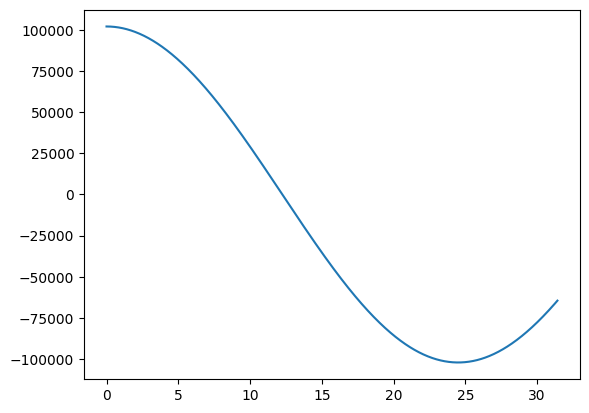

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10*np.pi, 1000)
y = df.groupby('State')['Profit'].sum()
amp = y.max() - y.min()
freq = 1 / len(y)
phase = np.pi / 2

sine_wave = amp * np.sin(2 * np.pi * freq * x + phase)

plt.plot(x, sine_wave)
plt.show()


Text(0.5, 1.0, 'Profit and Loss')

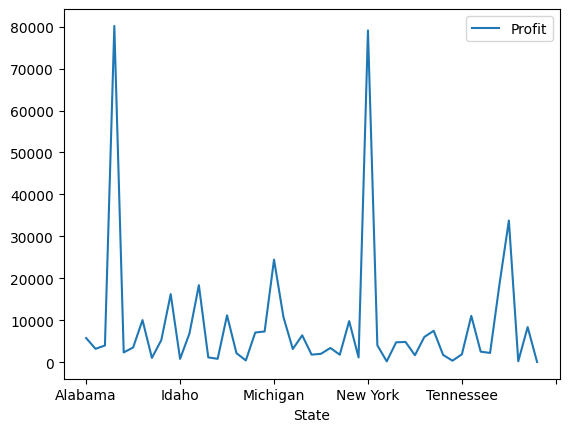

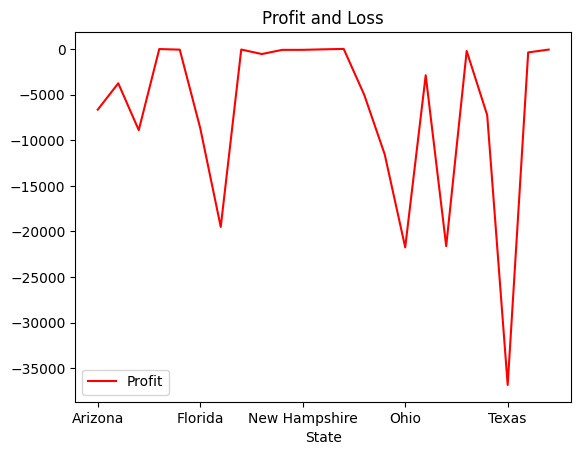

In [17]:
pd.DataFrame(df[df['Profit']>0].groupby('State')['Profit'].sum()).plot(kind='line')
pd.DataFrame(df[df['Profit']<0].groupby('State')['Profit'].sum()).plot(kind='line', c='red')
plt.title("Profit and Loss")

C:\Users\HP\AppData\Local\Temp\ipykernel_4032\3363701876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Profit"])


<Axes: xlabel='Profit', ylabel='Density'>

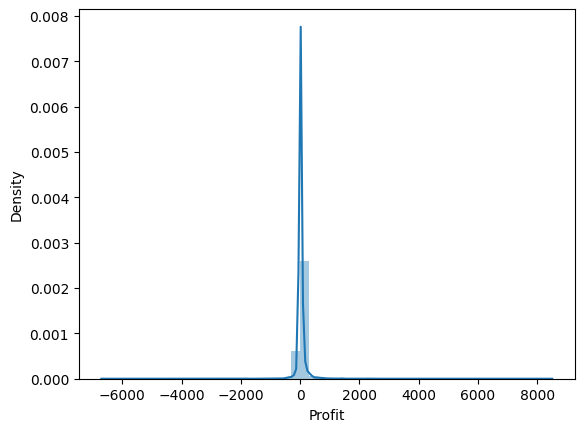

In [48]:
sns.distplot(df["Profit"])

C:\Users\HP\AppData\Local\Temp\ipykernel_4032\497969085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sales"])


<Axes: xlabel='Sales', ylabel='Density'>

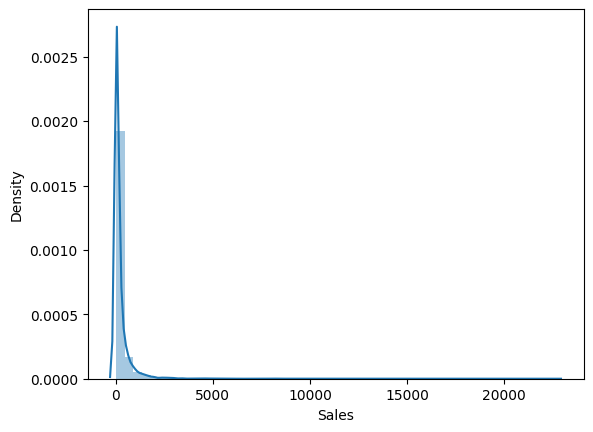

In [49]:
sns.distplot(df["Sales"])

### Corelation

C:\Users\HP\AppData\Local\Temp\ipykernel_8744\954606326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

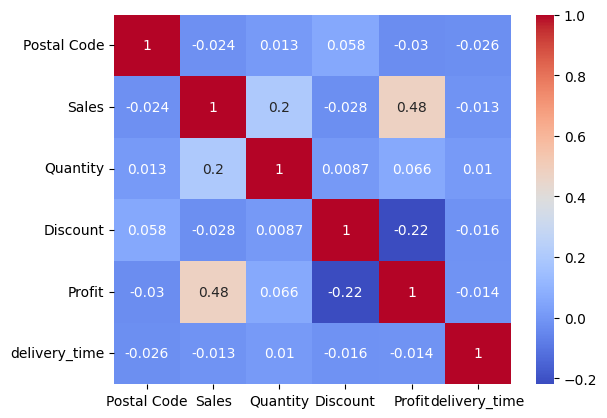

In [56]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [60]:
df.corr()['Profit']

C:\Users\HP\AppData\Local\Temp\ipykernel_8744\2688821881.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Profit']


Postal Code     -0.029968
Sales            0.479067
Quantity         0.066241
Discount        -0.219481
Profit           1.000000
delivery_time   -0.014208
Name: Profit, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_8744\4254333006.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()['Profit'].values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=label, xticklabels=['Profit'])


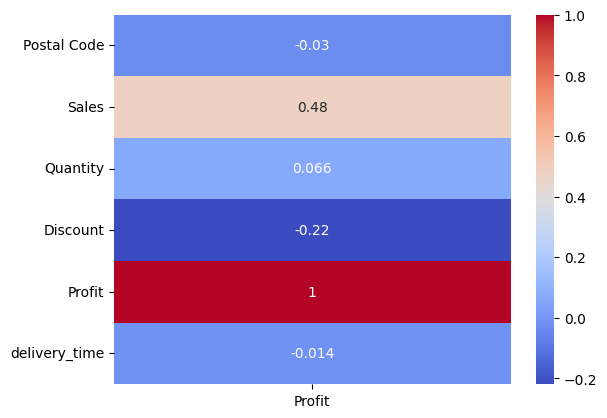

In [62]:
label = ['Postal Code','Sales', 'Quantity','Discount','Profit','delivery_time']
sns.heatmap(df.corr()['Profit'].values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=label, xticklabels=['Profit'])
plt.show()

- have to drop one of the column, 'Discount' or 'Profit' or 'Sales'

C:\Users\HP\AppData\Local\Temp\ipykernel_8744\2218840604.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()['Sales'].values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=label, xticklabels=['Sales'])


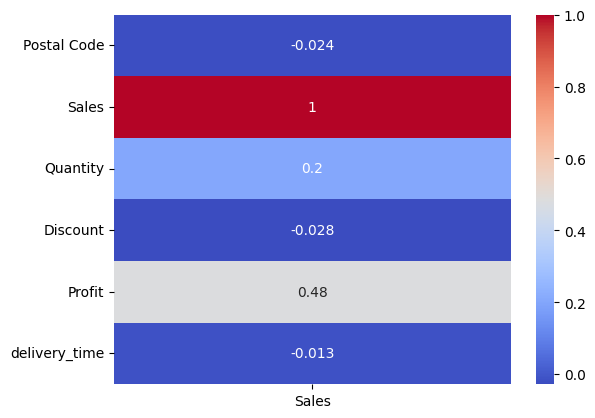

In [64]:
label = ['Postal Code','Sales', 'Quantity','Discount','Profit','delivery_time']
sns.heatmap(df.corr()['Sales'].values.reshape(-1, 1), annot=True, cmap='coolwarm', yticklabels=label, xticklabels=['Sales'])
plt.show()

# Price

In [65]:
df['cost price'] = (df['Sales'] - df['Profit'])/df['Quantity']
df['Price(before discount)'] = df['cost price'] + (df['cost price'] * df['Discount'])

Here we let the model to decide how much will be the discount 
- input will be Product's actual cost and a  price varry to the location or time etc.
- Only one output and that is Discount

In [66]:
def sale_price(df, product_name):
    try:
        new = df.loc[df['Product Name']==product_name]
        temp=new.iloc[0]
        return (temp['Price(before discount)'] - (temp['Price(before discount)'] * temp['Discount'])).round(2)
    except IndexError:
        print("Error: Product not found")

##### so we don't need 'Sale' column any more

In [67]:
df.drop('Sales', axis=1, inplace=True)

###### keep copy before transformation

In [68]:
p_df=df.copy()

In [69]:
df = p_df.copy()
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Discount,Profit,delivery_time,cost price,Price(before discount)
0,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,0.00,41.9136,92,110.0232,110.023200
1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,0.00,219.5820,92,170.7860,170.786000
2,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,0.00,6.8714,173,3.8743,3.874300
3,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,0.45,-383.0310,23,268.1217,388.776465
4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,0.20,2.5164,23,9.9258,11.910960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,3,0.20,4.1028,2,7.0484,8.458080
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,0.00,15.6332,5,38.1634,38.163400
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,2,0.20,19.3932,5,119.5914,143.509680
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,0.00,13.3200,5,4.0700,4.070000


In [71]:
print(df['Product Name'].unique().shape)
print(df['Postal Code'].unique().shape)

(1850,)
(631,)


- some product have same product 'ID', so we keep 'Name' column

In [69]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount',
       'Profit', 'delivery_time', 'cost price', 'Price(before discount)'],
      dtype='object')

### Selecting columns for our model

In [76]:
df=df[['Order ID', 'Ship Mode', 'Customer ID','City', 'Postal Code', 'Product Name', 'Quantity','Discount', 'delivery_time','cost price', 'Price(before discount)']]

In [77]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [78]:
from sklearn.metrics import r2_score,mean_absolute_error
from xgboost import XGBRegressor

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
df.shape

(9993, 11)

In [82]:
df

,Order ID,Ship Mode,Customer ID,City,Postal Code,Product Name,Quantity,Discount,delivery_time,cost price,Price(before discount)
0,CA-2016-152156,Second Class,CG-12520,Henderson,42420,Bush Somerset Collection Bookcase,2,0.00,92,110.0232,110.023200
1,CA-2016-152156,Second Class,CG-12520,Henderson,42420,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,0.00,92,170.7860,170.786000
2,CA-2016-138688,Second Class,DV-13045,Los Angeles,90036,Self-Adhesive Address Labels for Typewriters b...,2,0.00,173,3.8743,3.874300
3,US-2015-108966,Standard Class,SO-20335,Fort Lauderdale,33311,Bretford CR4500 Series Slim Rectangular Table,5,0.45,23,268.1217,388.776465
4,US-2015-108966,Standard Class,SO-20335,Fort Lauderdale,33311,Eldon Fold 'N Roll Cart System,2,0.20,23,9.9258,11.910960
...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,Second Class,TB-21400,Miami,33180,Ultra Door Pull Handle,3,0.20,2,7.0484,8.458080
9990,CA-2017-121258,Standard Class,DB-13060,Costa Mesa,92627,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,0.00,5,38.1634,38.163400
9991,CA-2017-121258,Standard Class,DB-13060,Costa Mesa,92627,Aastra 57i VoIP phone,2,0.20,5,119.5914,143.509680
9992,CA-2017-121258,Standard Class,DB-13060,Costa Mesa,92627,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,0.00,5,4.0700,4.070000


In [83]:
df['Product Name'] = df['Product Name'].apply(lambda x: x.replace(' ', ''))

C:\Users\HP\AppData\Local\Temp\ipykernel_4032\282414452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product Name'] = df['Product Name'].apply(lambda x: x.replace(' ', ''))


In [84]:
df['Product Name'] = df['Product Name'].apply(lambda x: x.lower())

C:\Users\HP\AppData\Local\Temp\ipykernel_4032\236803108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product Name'] = df['Product Name'].apply(lambda x: x.lower())


In [85]:
df['Order ID'] = df['Order ID'].apply(lambda x: x.replace('-', ''))
df['Customer ID'] = df['Customer ID'].apply(lambda x: x.replace('-', ''))

C:\Users\HP\AppData\Local\Temp\ipykernel_4032\614282640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order ID'] = df['Order ID'].apply(lambda x: x.replace('-', ''))
C:\Users\HP\AppData\Local\Temp\ipykernel_4032\614282640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'] = df['Customer ID'].apply(lambda x: x.replace('-', ''))


#### We will calculate profit ourself
scaler=MinMaxScaler()
df['Profit']=scaler.fit_transform(df[['Profit']])

In [86]:
df.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'City', 'Postal Code',
       'Product Name', 'Quantity', 'Discount', 'delivery_time', 'cost price',
       'Price(before discount)'],
      dtype='object')

In [87]:
X=df.drop(columns=['Discount'])
y=df[['Discount']]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
pd.DataFrame(X_train)

,Order ID,Ship Mode,Customer ID,City,Postal Code,Product Name,Quantity,delivery_time,cost price,Price(before discount)
6351,CA2017161130,Standard Class,BF11275,Miami,33178,polycomsoundpointip450voipphone,2,153,167.1364,200.56368
409,CA2017117457,Standard Class,KH16510,San Francisco,94110,"wireboundservicecallbooks,51/2""x4""",1,122,5.0336,5.03360
3309,CA2015144386,Standard Class,GT14635,New York City,10009,"wilsonjones1""hangingdubllockringbinders",6,184,2.7456,3.29472
9577,CA2015143147,Second Class,PS18760,San Antonio,78207,"globalstackchairwitharms,black",5,2,21.8854,28.45102
7607,CA2017121195,First Class,NS18505,Dallas,75220,economyrollawayfiles,2,3,122.2480,146.69760
...,...,...,...,...,...,...,...,...,...,...
5735,CA2014111773,Standard Class,JK15625,New York City,10024,wilsonjonesclip&carryfolderbindertoolforringbi...,3,114,3.0160,3.61920
5192,CA2014101560,Second Class,CS12250,Columbia,29203,eldoncleatmatpluschairmatsforhighpilecarpets,5,320,70.7728,70.77280
5391,US2014123183,Standard Class,GR14560,Wilmington,19805,avery480,6,6,1.9500,1.95000
860,CA2014133851,Standard Class,CM12445,San Francisco,94122,stapleremover,2,82,3.6064,3.60640


In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

column_transformer = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), ['Order ID', 'Customer ID', 'City', 'Postal Code','Product Name']),
    (OrdinalEncoder(), ['Ship Mode']),
    remainder='passthrough'
)

In [91]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

C:\python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### XGBRegressor

In [99]:
step2 = XGBRegressor(n_estimators=966, max_depth=9, learning_rate=0.09856146302609914,
                     subsample=0.9907173898128449, colsample_bytree=0.9706935947278399, gamma=0.0001511276663391705,
                     reg_alpha=1.742543362851141e-05, reg_lambda= 0.8658811495584423, min_child_weight=18)
step2.fit(X_train, y_train)
y_pred1 = step2.predict(X_test)


print('R2 score',r2_score(y_test,y_pred1))
print('MAE',mean_absolute_error(y_test,y_pred1))

R2 score 0.9753694710118725
MAE 0.017105469536918078
